In [1]:
import import_ipynb;
from my_functions import fit_models,plot_learning_curve;
import pandas as pd 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold, learning_curve
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns


dataset = pd.read_csv("FE_2.csv")
test_ = pd.read_csv("test.csv")
IDtest = test_["PassengerId"]
train = dataset[:890]
X_test = dataset[891:]
X_test.drop(labels=["Survived"],axis = 1,inplace=True)
train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
results = fit_models(X_train_scaled,Y_train)

importing Jupyter notebook from my_functions.ipynb


C:\Users\Nikit\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Nikit\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Nikit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nikit\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all convert

In [2]:
results.sort_values(by='CrossValMeans',ascending = False)
prev_result = pd.read_csv('prev_result.csv')
result = pd.concat([results, prev_result], axis=1, sort=False)
result['Difference'] = result.iloc[:, [1]] - result.iloc[:, [5]]
result.Difference = pd.to_numeric(result.Difference)
result.Difference = result.Difference.apply(lambda x: round(x,5))
result = result.drop(columns = result.columns[3])
results.sort_values('CrossValMeans',ascending=False)


,Algorithm,CrossValMeans,CrossValerrors
8,LogisticRegression,0.838520,0.043699
9,LinearDiscriminantAnalysis,0.834255,0.048969
10,XGB,0.820559,0.020952
3,RandomForest,0.819509,0.037745
5,GradientBoosting,0.812691,0.027503
4,ExtraTrees,0.794921,0.031211
2,AdaBoost,0.773160,0.041182
1,DecisionTree,0.766695,0.047606
6,MultipleLayerPerceptron,0.745347,0.045395
7,KNeighboors,0.546907,0.033997


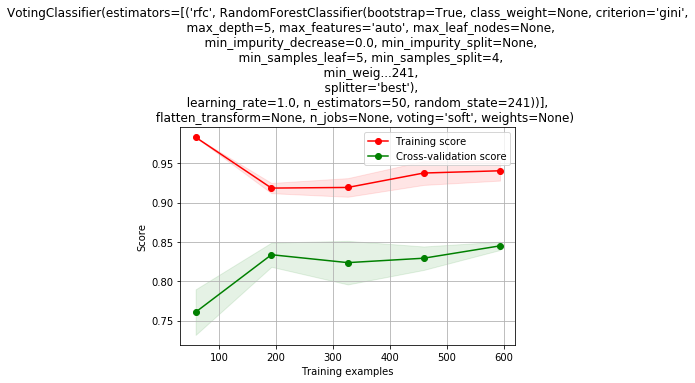

In [21]:
from collections import Counter
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics import accuracy_score 
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold, learning_curve,StratifiedKFold
import pandas as pd
import matplotlib.pyplot as plt
l = [VotingClassifier(voting='soft',estimators=[('rfc', rf_best), 
                                      ('extc', ext_best),
                                      ('gbc',gbm_best),
                                      ('xgb',xgb_best),                 
                                      ('ada',gsABC)])]
for i in l:
    g = plot_learning_curve(i, str(i),X_train_scaled,Y_train)
    estimator  = ""

In [4]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

kfold = KFold(n_splits=10,random_state=241)
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train_scaled,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  7.6min finished


0.8595505617977528

In [4]:
ABC = AdaBoostClassifier(DecisionTreeClassifier())
ABC_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[5,6,7,8,9,10,20],
              "learning_rate":  [0.001, 0.01, 0.1, 0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsABC.fit(X_train_scaled,Y_train)

ada_best = gsABC.best_estimator_

gsABC.best_score_



Fitting 10 folds for each of 224 candidates, totalling 2240 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 272 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 1717 tasks      | elapsed:    8.4s
[Parallel(n_jobs=6)]: Done 2240 out of 2240 | elapsed:    9.9s finished
C:\Users\Nikit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8202247191011236

In [44]:
ExtC = ExtraTreesClassifier()

ex_param_grid = {"max_depth": [3, 4, 5],
              "max_features": [3, 10, 15],
              "min_samples_split": [2, 3, 4],
              "min_samples_leaf": [1, 2],
              "bootstrap": [False,True],
              "n_estimators" :[100,300],
              "criterion": ["gini","entropy"]}


gsExtC = GridSearchCV(ExtC, param_grid = ex_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsExtC.fit(X_train_scaled,Y_train)

ext_best = gsExtC.best_estimator_

gsExtC.best_score_

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   44.8s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  9.5min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 12.2min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 15.3min
[Parallel(n_jobs=6)]: Done 4320 out of 4320 | elapsed: 16.3min finished


0.8539325842696629

In [2]:
rf_best = RandomForestClassifier(criterion='gini', 
                                            n_estimators=1100,
                                            max_depth=5,
                                            min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=241,
                                           n_jobs=-1,
                                           verbose=1)
GBM = GradientBoostingClassifier()

gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [450,500],
              'learning_rate': [0.1,0.11],
              'max_depth': [7,8],
              'min_samples_leaf': [30,40],
              'max_features': [0.1,0.4] 
              }

gsGBC = GridSearchCV(GBM, param_grid = gb_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsGBC.fit(X_train_scaled,Y_train)

gbm_best = gsGBC.best_estimator_

gsGBC.best_score_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   37.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 320 out of 320 | elapsed:  3.4min finished
C:\Users\Nikit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8449438202247191

In [18]:
rf_best = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=241,
                                           n_jobs=-1,
                                           verbose=0)
ext_best = ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=4, max_features=10, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=241, verbose=0, warm_start=False)
gsABC = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=241,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=241)
xgb_best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=8, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.95)
svm_best = SVC(C=45, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.031, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
# xgb_best = gsGBC.best_estimator_
# rf_best.fit(X_train_scaled,Y_train)
# ext_best.fit(X_train_scaled,Y_train)
# xgb_best.fit(X_train_scaled,Y_train)
# gsABC.fit(X_train_scaled,Y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Done 248 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 250 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 251 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 252 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 253 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 254 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 255 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 256 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 257 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 258 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 259 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 260 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 261 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 262 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 263 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 440 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 441 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 443 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 444 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 445 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 447 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 448 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 450 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 451 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 452 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 453 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 454 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 455 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 646 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 647 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 648 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 649 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 650 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 651 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 652 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 653 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 654 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 655 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 656 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 657 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 658 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 659 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 660 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 661 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 917 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 918 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 919 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 920 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 921 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 922 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 923 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 924 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 925 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 926 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 927 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 928 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 929 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 930 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 931 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 932 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Do

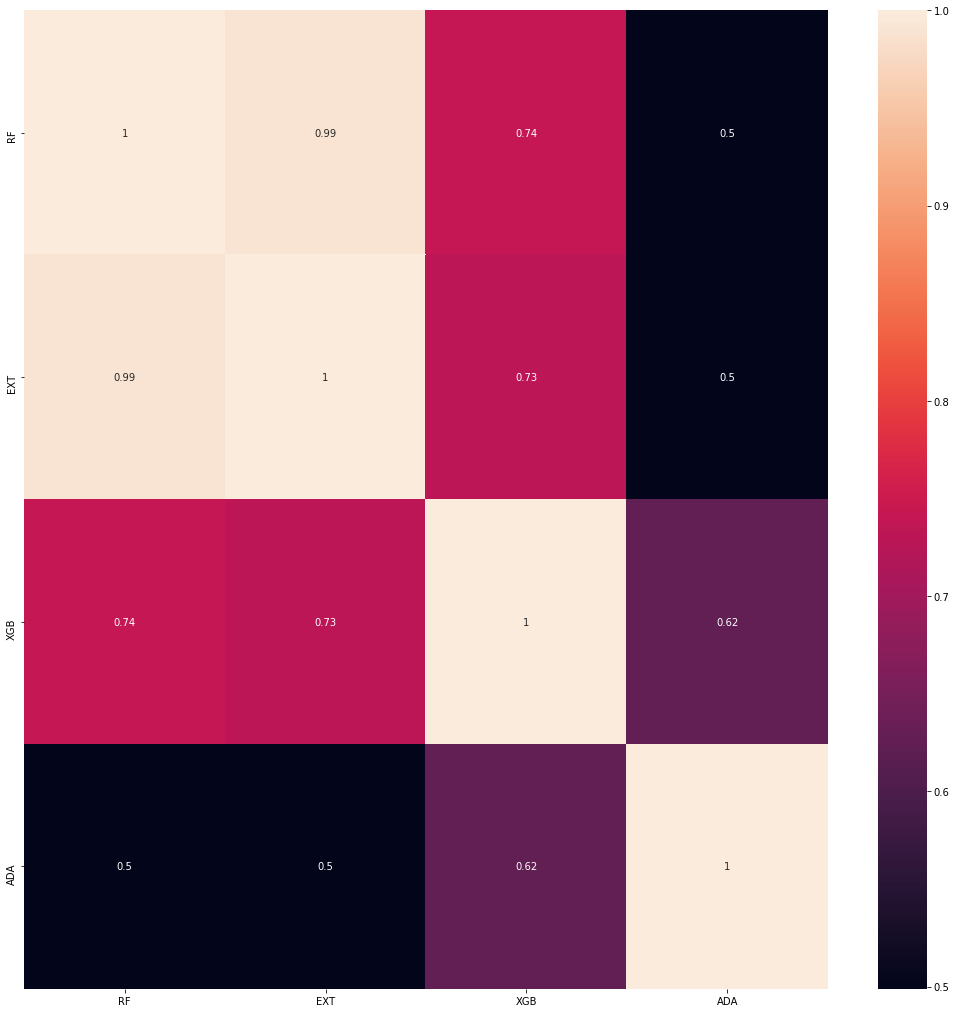

In [18]:
corr = pd.concat([pd.Series(rf_best.predict(X_test_scaled), name="RF"),
                              pd.Series(ext_best.predict(X_test_scaled), name="EXT"),
                              pd.Series(xgb_best.predict(X_test_scaled), name="XGB"),
                              pd.Series(gsABC.predict(X_test_scaled), name="ADA")],axis=1)

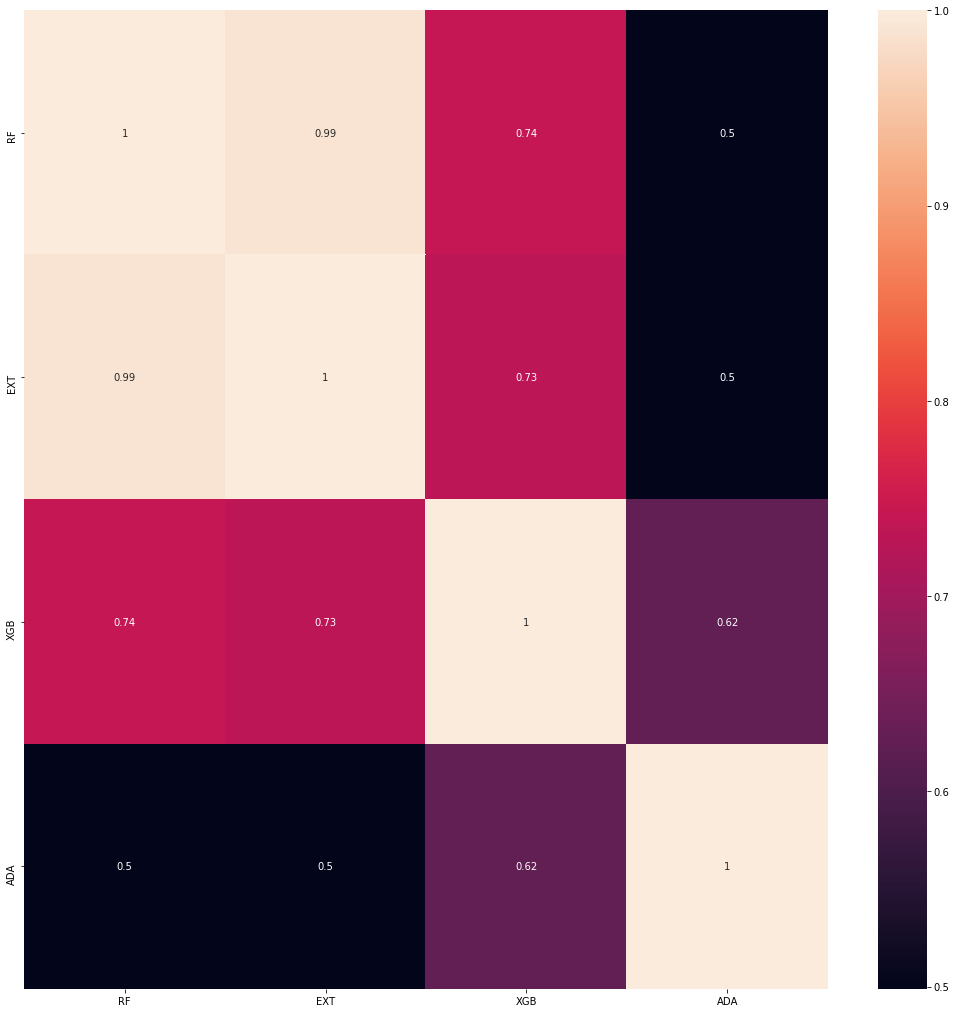

In [19]:
plt.figure(figsize=(18,18))
sns.heatmap(corr.corr(),annot=True)
plt.show()

In [11]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('rfc', RFC_best), 
                                      ('extc', ext_best),
                                      ('xgbc',gbm_best),
                                      ('ada',gsABC)])

v_param_grid = {'voting':['soft',
                          'hard']} # tuning voting parameter

gsV = GridSearchCV(voting, 
                   param_grid = 
                   v_param_grid, 
                   cv = 10, 
                   scoring = "accuracy",
                   n_jobs = 6, 
                   verbose = 1)

gsV.fit(X_train_scaled,Y_train)

v_best = gsV.best_estimator_

gsV.best_score_

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:   15.5s finished


0.8505617977528089

In [13]:
from sklearn.svm import SVC
SVMC = SVC(probability=True)

svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.027,0.029,0.03,0.031],
                  'C': [45,55,76,77,78,85,95,100],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train_scaled,Y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   27.9s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   57.7s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 1280 out of 1280 | elapsed:  1.7min finished


0.849438202247191

In [22]:
clf = VotingClassifier(voting='soft',estimators=[('rfc', rf_best), 
                                      ('extc', ext_best),
                                      ('gbc',gbm_best),
                                      ('xgb',xgb_best),                 
                                      ('ada',gsABC)])
clf.fit(X_train_scaled,Y_train)
predictions = clf.predict(X_test_scaled)

In [24]:
df = pd.DataFrame()
df['Survived'] = predictions
df.index = IDtest
df.to_csv('first_6.csv')